cluster = 6

Team Members :-
    
Vinayak Rama Gouda (1MS20IS411)

Spoorti U (1MS20IS410)

# start the programming by importing essential libraries

In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Importing of the dataset

In [102]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [103]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



# slicing it into independent and dependent variables

In [104]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

# performing a train test split on the dataset.providing the test size as 0.20.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

# Now have to create and train the Logistic Regression model with the training set

In [106]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Vinayak\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# storing the data into new variable

In [107]:
new_data = [1,85,66,29,0,26.6,0.351,31]

#  predict the values Based on the trained model

In [108]:
prediction = model.predict([new_data])
print("The Predicted Data is",prediction)

The Predicted Data is [0]


C:\Users\Vinayak\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Model is created, now we have to predict the output for the test set and calculate the accuracy for the given dataset

In [109]:
y_predict = model.predict(X_test)
acc = accuracy_score(y_predict,y_test)
print("The Accuracy is:",acc)
print("The Accuracy is:",acc*100)

The Accuracy is: 0.7857142857142857
The Accuracy is: 78.57142857142857


# confusion matrix

In [118]:
confusion_matrix = confusion_matrix(y_test, y_predict)
confusion_matrix

array([[87, 13],
       [20, 34]], dtype=int64)

In [119]:
TN, FN, FP, TP = metrics.confusion_matrix(list(y_test), list(y_predict), labels=[0, 1]).ravel()  
print("True Negatives", TN)
print("True Positives", TP)
print("False Positives", FP)
print("False Negatives", FN)

sklearnconf = metrics.confusion_matrix(y_test, y_predict)
print("\nsklearn Confusion Matrix is \n", sklearnconf)

conf=metrics.confusion_matrix(y_test, y_predict,labels=[1,0]) 
print("Confusion Matrix  is: \n", conf)

True Negatives 87
True Positives 34
False Positives 20
False Negatives 13

sklearn Confusion Matrix is 
 [[87 13]
 [20 34]]
Confusion Matrix  is: 
 [[34 20]
 [13 87]]


# confusion matrix graph

Text(0.5, 302.255, 'Predicted label')

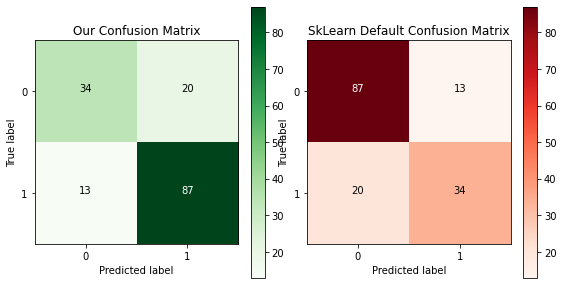

In [122]:
classes = [0, 1]

# plot confusion matrix we want 
myplt=plt.figure(figsize=(8,8))
ax1 = myplt.add_subplot(2,2,1)
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Our Confusion Matrix")
ax1=plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# plot confusion matrix given by sklearn

ax2 = myplt.add_subplot(2,2,2)
plt.imshow(sklearnconf, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("SkLearn Default Confusion Matrix")
ax2=plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = sklearnconf.max() / 2.
for i, j in itertools.product(range(sklearnconf.shape[0]), range(sklearnconf.shape[1])):
    plt.text(j, i, format(sklearnconf[i, j], fmt),
             horizontalalignment="center",
             color="white" if sklearnconf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')



# Inference

In this program we have taken diabetes.csv dataset for predict the value using Logistic regression algorithm 


Here we got 78 % accuracy_score and confusion Matrirx also calculated for this dataset.